---
# Metin Ön işleme ve Görselleştirme
---

## Problem : Wikipedia metinleri içeren veri setine metin ön işleme ve görselleştirme yapınız.

In [ ]:
from warnings import filterwarnings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import Word, TextBlob
from wordcloud import WordCloud

In [15]:
filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [16]:
df = pd.read_csv("wiki_data.csv", index_col=0)

In [17]:
df.head()

,text
1,Anovo\n\nAnovo (formerly A Novo) is a computer...
2,Battery indicator\n\nA battery indicator (also...
3,"Bob Pease\n\nRobert Allen Pease (August 22, 19..."
4,CAVNET\n\nCAVNET was a secure military forum w...
5,CLidar\n\nThe CLidar is a scientific instrumen...


In [18]:
df.shape

(10859, 1)

### Metin ön işleme için clean_text adında fonksiyon oluşturunuz. Fonksiyon;
#### - Büyük küçük harf dönüşümü,
#### - Noktalama işaretlerini çıkarma,
#### - Numerik ifadeleri çıkarma Işlemlerini gerçekleştirmeli.

In [19]:
def clean_text(text):
    # Normalizing Case Folding
    text = text.str.lower()
    # Punctuations
    text = text.str.replace(r'[^\w\s]', '', regex=True)
    text = text.str.replace("\n" , '', regex=True)
    # Numbers
    text = text.str.replace('\d', '', regex=True)
    return text

df["text"] = clean_text(df["text"])

In [20]:
df.head()

,text
1,anovoanovo formerly a novo is a computer servi...
2,battery indicatora battery indicator also know...
3,bob peaserobert allen pease august â â june ...
4,cavnetcavnet was a secure military forum which...
5,clidarthe clidar is a scientific instrument us...


### Metin içinde öznitelik çıkarımı yaparken önemli olmayan kelimeleri çıkaracak remove_stopwords adında fonksiyon yazınız.

In [24]:
def remove_stopwords(text):
    stop_words = stopwords.words('english')
    text = text.apply(lambda x: ' '.join([x for x in str(x).split() if x not in stop_words]))
    return text
df["text"] = remove_stopwords(df["text"])

In [25]:
# Metinde az geçen (1000'den az, 2000'den az gibi) kelimeleri bulunuz. Ve bu kelimeleri metin içerisinden çıkartınız.

temp_df = pd.Series(' '.join(df['text']).split()).value_counts()

In [26]:
temp_df

used               29034
also               22786
use                16461
â                  15383
one                15167
                   ...  
rockcrawling           1
truggies               1
usetransfer            1
coloradovarious        1
tppn                   1
Name: count, Length: 265377, dtype: int64

In [27]:
drops = temp_df[temp_df < 1000]

In [28]:
df["text"] = df["text"].apply(lambda x: ' '.join(x for x in x.split() if x not in drops))

In [29]:
df.head()

,text
1,computer services company based france founded...
2,battery battery also known battery device info...
3,august â â june analog integrated circuit desi...
4,military became april part allows access knowl...
5,scientific instrument used lower camera turn l...


In [30]:
# Metinleri tokenize edip sonuçları gözlemleyiniz.

df["text"].apply(lambda x: TextBlob(x).words)

1        [computer, services, company, based, france, f...
2        [battery, battery, also, known, battery, devic...
3        [august, â, â, june, analog, integrated, circu...
4        [military, became, april, part, allows, access...
5        [scientific, instrument, used, lower, camera, ...
                               ...                        
10855    [company, wireless, audio, technologies, consu...
10856    [input, signal, frequency, within, full, frequ...
10857    [technology, term, used, national, combination...
10858    [network, usually, system, wind, installed, si...
10859    [transfer, transfer, case, part, multiple, pow...
Name: text, Length: 10859, dtype: object

In [31]:
# Lemmatization işlemi yapınız.

def lemmatize_text(text):
    text = text.apply(lambda x: ' '.join([Word(word).lemmatize() for word in x.split()]))
    return text
df["text"] = lemmatize_text(df["text"])

In [32]:
df.head()

,text
1,computer service company based france founded ...
2,battery battery also known battery device info...
3,august â â june analog integrated circuit desi...
4,military became april part allows access knowl...
5,scientific instrument used lower camera turn l...


### Veriyi Görselleştiriniz
- Metindeki terimlerin frekanslarını hesaplayınız.
- Bir önceki adımda bulduğunuz terim frekanslarının Barplot grafiğini oluşturunuz.
- Kelimeleri WordCloud ile görselleştiriniz.

In [33]:
tf = df["text"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

In [34]:
tf.columns = ["words", "tf"]

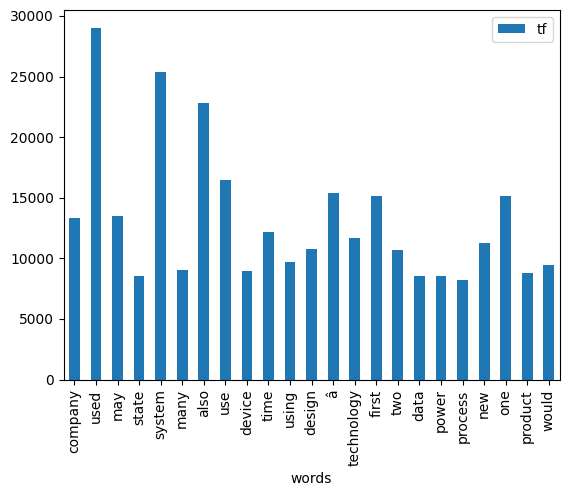

In [37]:
tf[tf["tf"] > 8000].plot.bar(x="words", y="tf")
plt.show()

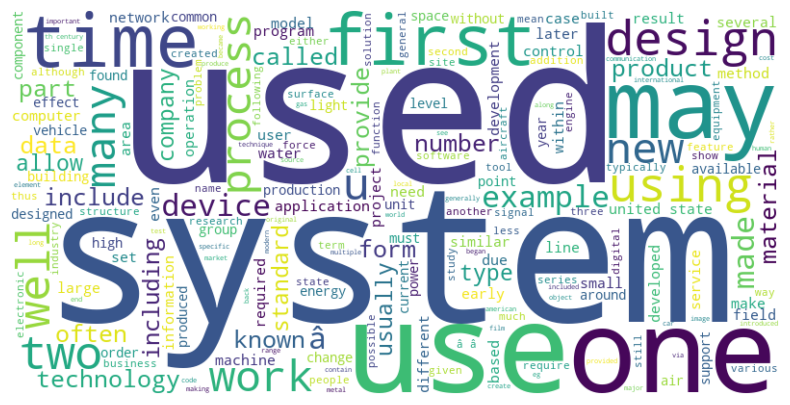

In [38]:
text = " ".join(i for i in df["text"]) # kelimeleri birleştir
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Tüm Aşamaları Tek Bir Fonksiyon Olarak Yazınız 
- Metin ön işleme işlemlerini gerçekleştiriniz.
- Görselleştirme işlemlerini fonksiyona argüman olarak ekleyiniz.
- Fonksiyonu açıklayan 'docstring' yazınız.

In [39]:
df = pd.read_csv("wiki_data.csv", index_col=0)

In [40]:
def wiki_processing(text, Barplot=False, wordcloud=False):
    """ Wiki metinlerini işleme fonksiyonu.
    Args:
        text (str): İşlenecek metin.
        Barplot (bool): Kelime frekanslarını barplot olarak gösterir.
        wordcloud (bool): Kelime bulutunu gösterir.
    Returns:
        pd.DataFrame: İşlenmiş metin verisi.

    Raises:
        ValueError: Eğer text boş ise hata fırlatır.
    
    Example:
        >>> wiki_processing("This is a sample text.", Barplot=True, wordcloud=True)
        İşlenmiş metin verisi döner.
    """

    text = text.str.lower()
    text = text.str.replace(r'[^\w\s]', '', regex=True)
    text = text.str.replace("\n", '', regex=True)
    text = text.str.replace('\d', '', regex=True)
    stop_words = stopwords.words('english')
    text = text.apply(lambda x: ' '.join([x for x in str(x).split() if x not in stop_words]))
    drops = pd.Series(' '.join(text).split()).value_counts()[-1000:]
    text = text.apply(lambda x: ' '.join(x for x in x.split() if x not in drops))
    text = text.apply(lambda x: ' '.join([Word(word).lemmatize() for word in x.split()]))
    tf = text.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
    tf.columns = ["words", "tf"]
    if Barplot:
        tf[tf["tf"] > 8000].plot.bar(x="words", y="tf")
        plt.show()
    if wordcloud:
        text = " ".join(i for i in text)
        wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.show()

    return text


In [1]:
wiki_processing(df["text"])

NameError: name 'wiki_processing' is not defined